In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd

This first onset dataset proved not to be useful and the dataset generated was so large it became troublesome, **skip to the *Accurate dataset* section**

In [3]:
def select_onsets(y, df, onsets, samples, disp):
    for i in tqdm(range(len(onsets) - 1), leave=False):
        if onsets[i]:
            x = int(onsets[i] - 7*samples/16)
            for dx in tqdm(range(0, int(14*samples/16) - 1, int(disp/2)), leave=False):
                if (x + dx + samples) <= len(y):
                    df = df.append(pd.DataFrame({**{"x{}".format(k): y[j] for j, k in zip(range(x + dx, x + dx + samples),
                                                                                          range(samples))},
                                                 **{"Onset": [1]}}))

            x = onsets[i] + 2 * samples
            for dx in tqdm(range(0, onsets[i+1] - onsets[i] - 2 * samples - 1, disp), leave=False):
                if (x + dx + samples) <= len(y):
                    df = df.append(pd.DataFrame({**{"x{}".format(k): y[j] for j, k in zip(range(x + dx, x + dx + samples - 1),
                                                                                          range(samples))}, 
                                                 **{"Onset": [0]}}))
        else:
            x = onsets[i]
            for dx in tqdm(range(0, int(14*samples/16) - 1, int(disp/2)), leave=False):
                df = df.append(pd.DataFrame({**{"x{}".format(k): y[j] for j, k in zip(range(x + dx, x + dx + samples - 1),
                                                                                      range(samples))}, 
                                             **{"Onset": [1]}}))
            x = onsets[i] + 2 * samples
            for dx in tqdm(range(0, onsets[i+1] - onsets[i] - 2 * samples - 1, disp), leave=False):
                df = df.append(pd.DataFrame({**{"x{}".format(k): y[j] for j, k in zip(range(x + dx, x + dx + samples - 1),
                                                                                      range(samples))}, 
                                             **{"Onset": [0]}}))
    return df

In [4]:
onset_dict = {
    "riff1": [0, 4000, 6000, 10000, 12000, 14000, 16000, 20000, 21000, 22000, 32000],
    "riff2": [i for i in range(0, 32001, 2000)],
    "riff3": [i for i in range(0, 8001, 1000)] + [10000],
    "riff4": [0, 2000, 4000, 6000, 8000, 10000, 12000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 32000],
    "riff5": [i for i in range(0, 32001, 1000)],
    "riff7": [i for i in range(0, 16001, 2000)],
    "riff8": [0, 3000, 6000, 8000, 11000, 14000, 16000],
    "ind": [i for i in range(0, 24*4000, 4000)] + [24*4000+2000]
}

In [5]:
def file_to_onset_data(file, samples, riff, disp):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, 8000)
    df = pd.DataFrame(columns=["x{}".format(i) for i in range(samples)]+["Onset"])
    
    if riff:
        if "riff1" in file:
            onsets = onset_dict["riff1"]
        elif "riff2" in file:
            onsets = onset_dict["riff2"]
        elif "riff3" in file:
            onsets = onset_dict["riff3"]
        elif "riff4" in file:
            onsets = onset_dict["riff4"]
        elif "riff5" in file:
            onsets = onset_dict["riff5"]
        elif "riff7" in file:
            onsets = onset_dict["riff7"]
        elif "riff8" in file:
            onsets = onset_dict["riff8"]
        else:
            return None
    
    else:
        onsets = onset_dict["ind"]
    
    df = select_onsets(y, df, onsets, samples, disp)
    df = df.reset_index(drop=True)
    return df

In [8]:
test = file_to_onset_data("../../../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", 200, 1, 200)

E:\Anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
test.head()

,Onset,x0,x1,x10,x100,x101,x102,x103,x104,x105,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1,6.422385e-11,-1.754744e-10,4.074042e-09,0.000026,-0.000012,-0.000012,0.000031,0.000050,0.000019,...,-0.000027,-0.000025,-0.000018,-0.000008,-0.000014,-0.000015,-0.000038,-0.000035,0.000006,0.000034
1,1,2.629269e-05,-1.175315e-05,5.670377e-06,-0.001165,-0.001950,0.001080,0.005519,0.007724,0.003928,...,-0.000260,-0.000231,-0.000041,0.000182,0.000445,0.000489,0.000289,0.000256,-0.000123,0.000422
2,0,-4.661865e-02,-7.923442e-02,7.023876e-02,-0.102603,-0.073123,-0.041121,-0.022685,-0.009761,0.005428,...,0.004193,-0.006696,-0.009915,0.001136,0.011936,0.009224,-0.005468,-0.028230,-0.065111,-0.100679
3,0,-3.648716e-02,-1.992749e-02,5.887168e-02,-0.007833,0.014246,0.049183,0.087734,0.110775,0.110500,...,0.020023,0.006560,-0.031573,-0.069176,-0.086558,-0.083763,-0.066905,-0.045872,-0.030751,-0.019982
4,0,6.665691e-02,9.692012e-02,-3.602055e-02,0.105174,0.097274,0.076450,0.050918,0.030016,0.008577,...,-0.077064,-0.062562,-0.044481,-0.034992,-0.031268,-0.018616,0.008920,0.047062,0.081094,0.100056


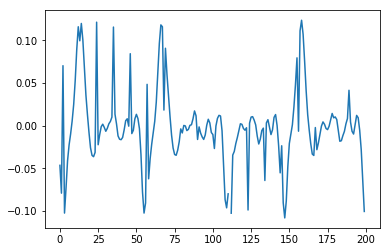

In [10]:
plt.plot(test.drop("Onset", axis=1).iloc[2].values)

In [13]:
y, sr = librosa.load("../../../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)

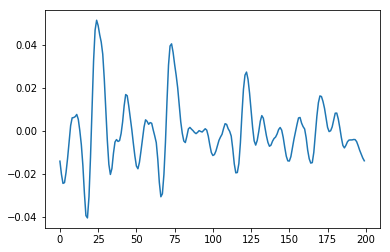

In [14]:
plt.plot(y[3900:4100])

In [5]:
def dir_to_onset_data(directory, samples, riff, disp):
    try:
        data = pd.read_pickle("../../../Data/Guitar/temp.pkl")
    except:
        data = pd.DataFrame(columns=["x{}".format(i) for i in range(samples)]+["Onset"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = file_to_onset_data(directory + file, samples, riff, disp)
        data = data.append(df)
        data.to_pickle("../../../Data/Guitar/temp.pkl")
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [ ]:
data = dir_to_onset_data("../../../Samples/Guitar/Ind_notes/", 200, 0, 5)

e:\anaconda\envs\tfm\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
data.shape

(13776, 201)

In [11]:
data.sample(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x191,x192,x193,x194,x195,x196,x197,x198,x199,Onset
5622,-0.007791,-0.004476,-0.002735,0.001758,0.006672,0.011549,0.016547,0.018137,0.017795,0.017337,...,0.005033,0.010949,0.015244,0.013970,0.009261,0.005416,0.004285,0.002719,-0.002892,1
7130,-0.004118,-0.005015,-0.006735,-0.009350,-0.012732,-0.016790,-0.019620,-0.017090,-0.011329,0.000720,...,-0.043507,-0.039983,-0.024651,-0.005019,0.009306,0.008035,0.006180,0.004127,-0.007195,1
9328,0.102811,0.096770,0.094474,0.086458,0.074500,0.065529,0.057564,0.051700,0.042838,0.032645,...,0.032532,0.031770,0.023866,0.013378,0.004593,-0.001065,-0.004615,-0.006402,-0.008445,1
11018,0.104486,0.095108,0.088563,0.085136,0.084814,0.084049,0.080343,0.070015,0.049133,0.019628,...,0.001089,-0.002078,-0.006691,-0.012066,-0.016434,-0.017460,-0.015641,-0.013411,-0.012273,1
2132,0.001269,0.001651,-0.001160,-0.000946,-0.000141,-0.001746,-0.001064,-0.000814,-0.003305,-0.002353,...,-0.053454,-0.056436,-0.051290,-0.063389,-0.119589,-0.155695,-0.193731,-0.224543,-0.179752,1


In [ ]:
data_ = dir_to_onset_data("../../../Samples/Guitar/Riffs/", 200, True, 5)

In [18]:
data_.shape

(2602, 201)

In [20]:
data = data.append(data_)

In [21]:
data.shape

(16378, 201)

In [22]:
data.to_pickle("../../../Data/Guitar/guitar-onset-data-200.pkl")

## Accurate dataset 

In [2]:
%run ../../Utilities.ipynb

Using TensorFlow backend.


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
from ipykernel.pylab.backend_inline import flush_figures
from IPython.display import display
from ipywidgets import Button, jslink, Checkbox
%matplotlib inline

In [17]:
def add_data(y, x, onset):
    try:
        data_temp = pd.read_pickle("../../../Data/Guitar/acc-onset-data.pkl")
    except:
        data_temp = pd.DataFrame()
    try:
        data_spec = pd.read_pickle("../../../Data/Guitar/acc-onset-data-spectral.pkl")
    except:
        data_spec = pd.DataFrame()
    x = x - 30
    for dx in range(0, 60, 5):
        temp = temp_data(y[x+dx:x+dx+300], 300, False)
        temp["Onset"] = int(onset)
        spec = spectral_data(y[x+dx:x+dx+300], 300, False)
        spec["Onset"] = int(onset)
        data_temp = data_temp.append(temp)
        data_spec = data_spec.append(spec)
    data_temp.to_pickle("../../../Data/Guitar/acc-onset-data.pkl")
    data_spec.to_pickle("../../../Data/Guitar/acc-onset-data-spectral.pkl")

In [4]:
def f(x):
    plt.figure(figsize=(18,6))
    plt.plot(y)
    plt.axvline(x=int(x), color="r")
    plt.axvline(x=int(x)+300, color="r")
    plt.axvline(x=int(x)+150, color="r", linestyle="--")
    plt.show()

In [19]:
def on_button_clicked(b):
    add_data(y, int(slider.value), checkbox.value)

### Interactive dataset creator!

Load file, place window, select whether it is an onset or not and click *add data*. It will generate both temporal and spectral data

In [5]:
y = load_file("../../../Samples/Guitar/Riffs/Guitar_noamp_riff11_8.mp3", 8000)

In [6]:
slider = FloatSlider(min=0, max=len(y), step=50, continuous_update=False)
interact(f, x=slider)
button = Button(description="Add data")
checkbox = Checkbox(
    value=False,
    description='Onset',
    disabled=False
)
display(checkbox, button)
button.on_click(on_button_clicked)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=16513.0, step=50.0)…

Checkbox(value=False, description='Onset')

Button(description='Add data', style=ButtonStyle())

NameError: name 'on_button_clicked' is not defined

In [84]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data.pkl")

In [85]:
data.shape

(32540, 301)

In [296]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data-spectral.pkl")

In [297]:
data.shape

(32854, 301)

## Accurate larger window

In [26]:
%run ../../Utilities.ipynb

In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
from ipykernel.pylab.backend_inline import flush_figures
from IPython.display import display
from ipywidgets import Button, jslink, Checkbox
%matplotlib inline

In [28]:
def add_data(y, x, onset):
    try:
        data_temp = pd.read_pickle("../../../Data/Guitar/acc-onset-data-600.pkl")
    except:
        data_temp = pd.DataFrame()
    try:
        data_spec = pd.read_pickle("../../../Data/Guitar/acc-onset-data-spectral-600.pkl")
    except:
        data_spec = pd.DataFrame()
    x = x - 30
    for dx in range(0, 60, 5):
        temp = temp_data(y[x+dx:x+dx+600], 600, False)
        temp["Onset"] = int(onset)
        spec = spectral_data(y[x+dx:x+dx+600], 600, False)
        spec["Onset"] = int(onset)
        data_temp = data_temp.append(temp)
        data_spec = data_spec.append(spec)
    data_temp.to_pickle("../../../Data/Guitar/acc-onset-data-600.pkl")
    data_spec.to_pickle("../../../Data/Guitar/acc-onset-data-spectral-600.pkl")

In [29]:
def f(x):
    plt.figure(figsize=(18,6))
    plt.plot(y)
    plt.axvline(x=int(x), color="r")
    plt.axvline(x=int(x)+600, color="r")
    plt.axvline(x=int(x)+300, color="r", linestyle="--")
    plt.show()

In [30]:
def on_button_clicked(b):
    add_data(y, int(slider.value), checkbox.value)

### Interactive dataset creator!

Load file, place window, select whether it is an onset or not and click *add data*. It will generate both temporal and spectral data

In [31]:
y = load_file("../../../Samples/Guitar/Riffs/Guitar_noamp_riff1_6.mp3", 8000)

In [32]:
slider = FloatSlider(min=0, max=len(y), step=50, continuous_update=False)
interact(f, x=slider)
button = Button(description="Add data")
checkbox = Checkbox(
    value=False,
    description='Onset',
    disabled=False
)
display(checkbox, button)
button.on_click(on_button_clicked)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=32449.0, step=50.0)…

Checkbox(value=False, description='Onset')

Button(description='Add data', style=ButtonStyle())

In [50]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data-600.pkl")

In [51]:
data.shape

(35328, 601)

In [52]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data-spectral-600.pkl")

In [53]:
data.shape

(35328, 601)

## Spectral

Not sure what this was. In any case the dataset that was used for onset detection is the one built interactively because automated methods were not reliable.

In [33]:
%run ../../Utilities.ipynb

In [106]:
def data_to_spectral(x):
    new_data = spectral_data(x.iloc[:x.shape[0]-1].values, x.shape[0]-1, False)
    return new_data.values[0]

In [107]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data.pkl")

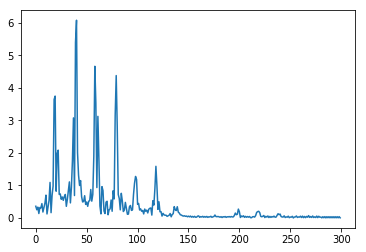

In [115]:
plt.plot(data.sample().apply(data_to_spectral, axis=1)[0])

In [120]:
a = pd.DataFrame({"x{}".format(i): [data.sample().apply(data_to_spectral, axis=1)[0][i]] for i in range(300)})
a

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299
0,0.077826,0.575681,0.038208,0.271282,0.04628,0.853508,0.215131,0.355989,0.550176,0.173346,...,0.011294,0.022596,0.005452,0.006407,0.01851,0.019233,0.036925,0.048958,0.003979,0.000363


In [127]:
data_spectral_300 = pd.DataFrame()

for i in tqdm(range(data.shape[0])):
    temp = spectral_data(data.iloc[i, :data.shape[1]-1].values, data.shape[1]-1, False)
    temp["Onset"] = data.iloc[i, data.shape[1]-1]
    data_spectral_300 = data_spectral_300.append(temp)

In [132]:
data_spectral_300["Onset"] = data_spectral_300["Onset"].apply(lambda x: int(x))

In [133]:
data_spectral_300.sample()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x291,x292,x293,x294,x295,x296,x297,x298,x299,Onset
0,0.160861,0.213449,0.213158,0.278395,0.192538,0.061438,0.256768,0.398764,0.261879,0.044682,...,0.006764,0.009136,0.006404,0.009317,0.006469,0.008687,0.005287,0.008123,0.006002,1


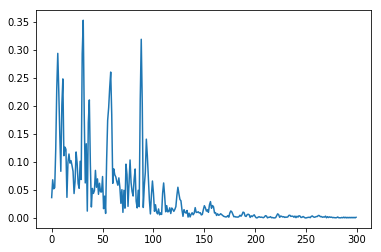

In [139]:
plt.plot(data_spectral_300.drop("Onset", axis=1).sample().values[0])

In [140]:
data_spectral_300.to_pickle("../../../Data/Guitar/acc-onset-data-spectral.pkl")

In [141]:
data = pd.read_pickle("../../../Data/Guitar/acc-onset-data-600.pkl")

In [142]:
data_spectral_600 = pd.DataFrame()

for i in tqdm(range(data.shape[0])):
    temp = spectral_data(data.iloc[i, :data.shape[1]-1].values, data.shape[1]-1, False)
    temp["Onset"] = int(data.iloc[i, data.shape[1]-1])
    data_spectral_600 = data_spectral_600.append(temp)

In [143]:
data_spectral_600.sample()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x591,x592,x593,x594,x595,x596,x597,x598,x599,Onset
0,0.012895,0.434641,0.026556,0.422443,0.087365,0.384921,0.060159,0.378189,0.095049,0.319747,...,0.020671,0.029027,0.020715,0.028936,0.020772,0.028838,0.020701,0.029027,0.020818,0


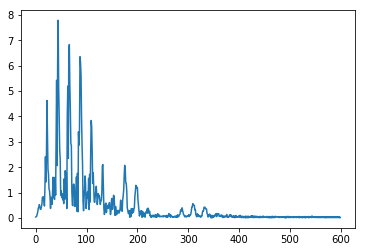

In [144]:
plt.plot(data_spectral_600.drop("Onset", axis=1).sample().values[0])

In [145]:
data_spectral_600.to_pickle("../../../Data/Guitar/acc-onset-data-spectral-600.pkl")